In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [37]:
# 1.Get the numerical variables from our dataset.

In [38]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
df.columns= df.columns.str.lower().str.replace(' ', '_')

In [39]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [72]:
df_num = df.select_dtypes(np.number)
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [41]:
#2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

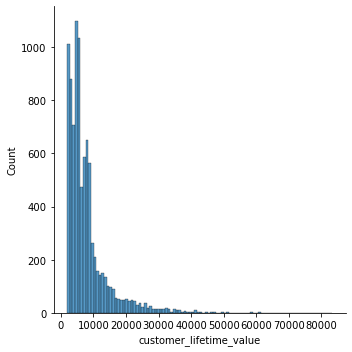

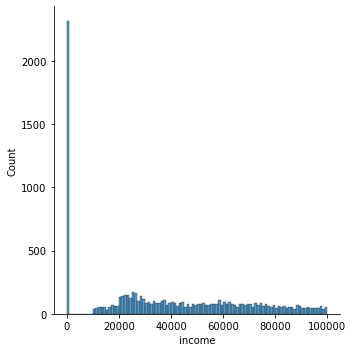

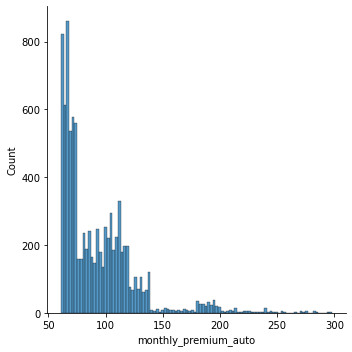

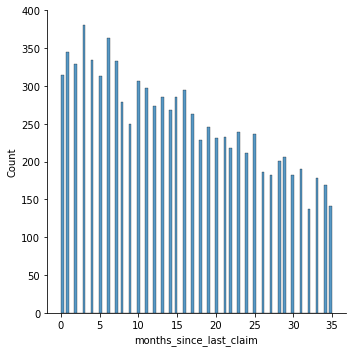

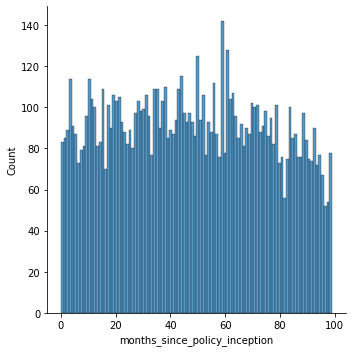

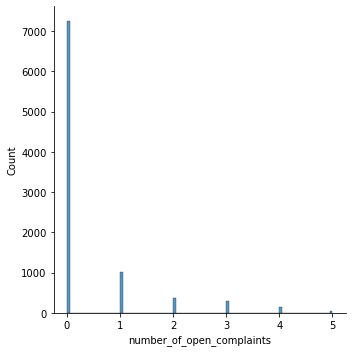

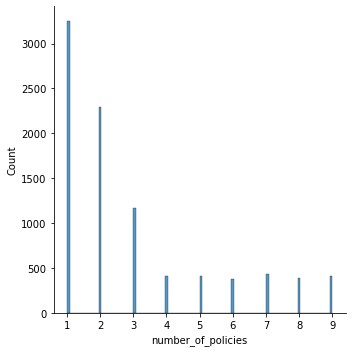

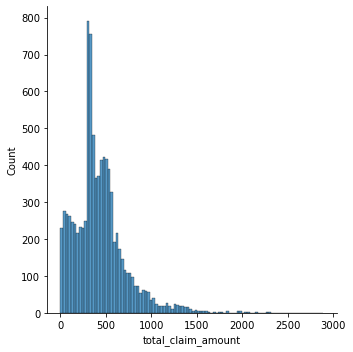

In [42]:
for i in df_num.columns:
    sns.displot(df_num[i], bins=100)

In [43]:
#3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [44]:
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
df_num_log = df_num.copy()

for i in df_num_log.columns:
    df_num_log[i] = df_num_log[i].apply(lambda x :log_transfom_clean1(x))

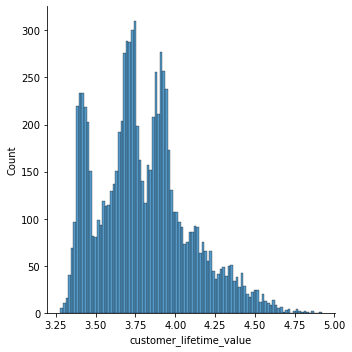

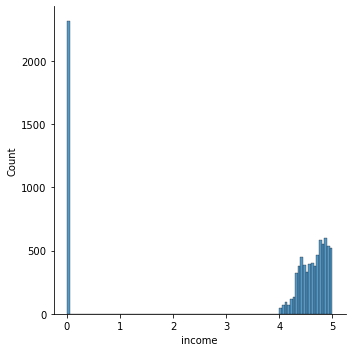

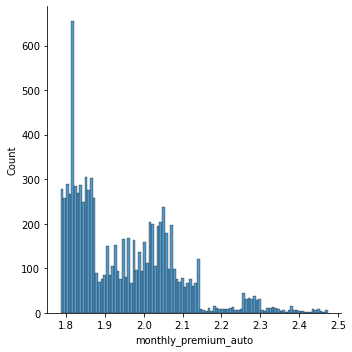

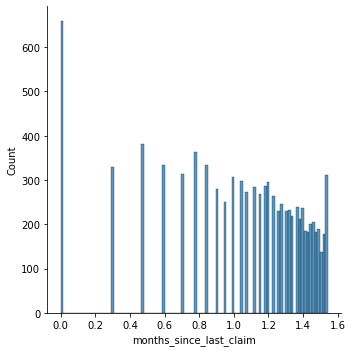

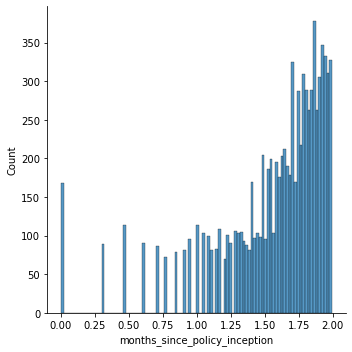

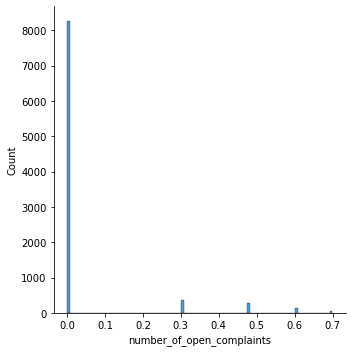

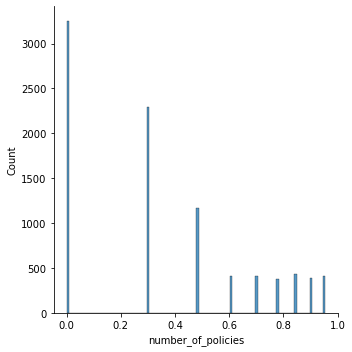

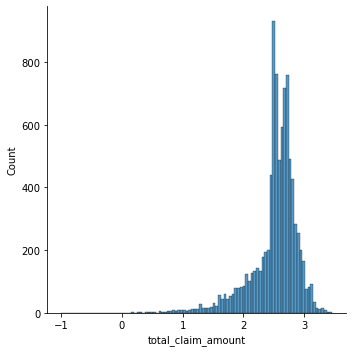

In [61]:
for i in df_num.columns:
    sns.displot(df_num_log[i], bins=100)    

In [46]:
# Box Cox Transformation

In [77]:
for i in df_num.columns:
    fitted_data, fitted_lambda = stats.boxcox(df[i]>0)
    sns.displot(fitted_data, bins=50)

ValueError: Data must not be constant.

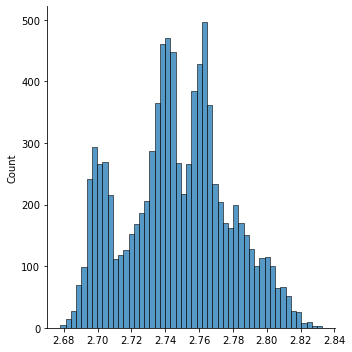

In [65]:
fitted_data, fitted_lambda = stats.boxcox(df['customer_lifetime_value'])
sns.displot(fitted_data, bins=50)

In [ ]:
#I can do box cox transformation for those columns where data is higher than 0
#this transoformation makes non-normal distribution look like normal distribution
#A Box cox transformation is defined as a way to transform non-normal dependent variables 
#in our data to a normal shape through which we can run a lot more tests than we could have.